# Praktikum 2 SVM pada image

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


In [2]:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)

(1348, 62, 47)

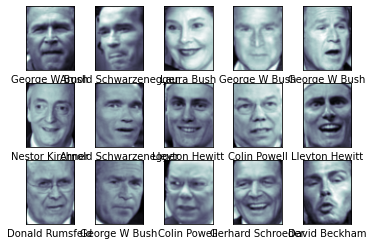

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Mengambil dataset contoh wajah
faces = fetch_lfw_people(min_faces_per_person=30)

# Membuat subplots dengan ukuran 3 baris dan 5 kolom
fig, ax = plt.subplots(3, 5)

# Menampilkan contoh wajah pada setiap subplot
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# Menampilkan plot
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [6]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

Wall time: 1min 6s
{'svc__C': 10, 'svc__gamma': 0.001}
0.6752919765785725


prediksi label untuk data testing

In [8]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

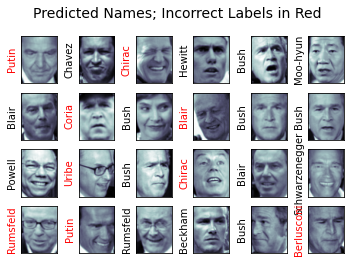

In [9]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [10]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.62      0.71      0.67         7
             Alvaro Uribe       0.71      0.56      0.63         9
             Andre Agassi       0.50      0.40      0.44        10
             Ariel Sharon       0.57      0.68      0.62        19
    Arnold Schwarzenegger       0.40      0.36      0.38        11
             Colin Powell       0.73      0.67      0.70        55
            David Beckham       0.33      0.67      0.44         6
          Donald Rumsfeld       0.71      0.74      0.72        34
            George W Bush       0.84      0.84      0.84       140
        Gerhard Schroeder       0.66      0.66      0.66        29
  Gloria Macapagal Arroyo       0.82      0.90      0.86        10
          Guillermo Coria       0.67      0.40      0.50        10
                Hans Blix       0.17      0.11      0.13         9
              Hugo Chavez       0.67      0.60      0.63     

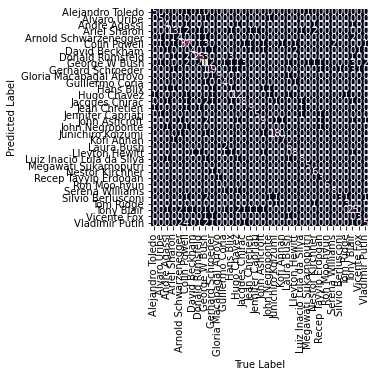

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
mat = confusion_matrix(ytest, yfit)

# Menampilkan confusion matrix dengan heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Menampilkan plot
plt.show()